In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
# 파일 경로 설정
file_paths = [
    '/home/work/daehyun/InfoBatch/results/results_cifar10/results_r18_0.5_0.875_0_infobatch.pkl',
    '/home/work/daehyun/InfoBatch/results/results_cifar10/results_r50_0.5_0.875_0_infobatch.pkl',
    '/home/work/daehyun/InfoBatch/results/results_cifar10/results_r18_0.5_0.875_0_Noinfobatch.pkl',
    '/home/work/daehyun/InfoBatch/results/results_cifar10/results_r50_0.5_0.875_0_Noinfobatch.pkl'
]

labels = [
    'ResNet18 with InfoBatch',
    'ResNet50 with InfoBatch',
    'ResNet18 without InfoBatch',
    'ResNet50 without InfoBatch'
]

In [3]:
# 데이터 로드 및 시각화를 위한 빈 리스트 생성
train_accs = []
valid_accs = []
train_losses = []
valid_losses = []
best_accs = []
total_times = []

# 파일 로드 및 데이터 추출
for file_path in file_paths:
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    train_accs.append(data['train_acc'])
    valid_accs.append(data['valid_acc'])
    train_losses.append(data['train_loss'])
    valid_losses.append(data['valid_loss'])
    best_accs.append(data['best_acc'])
    total_times.append(data['total_time'])

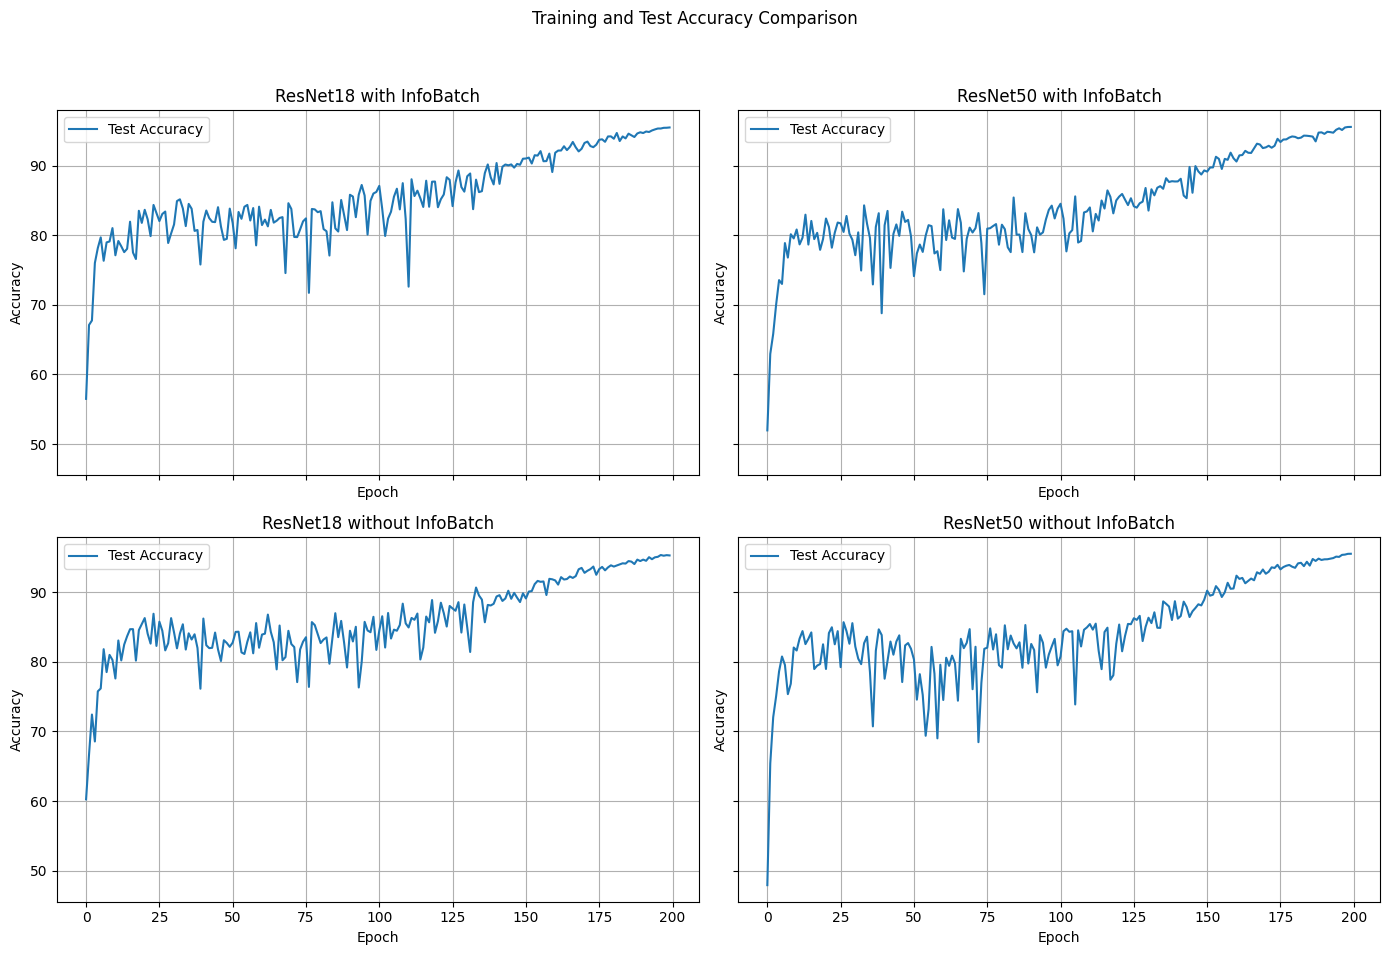

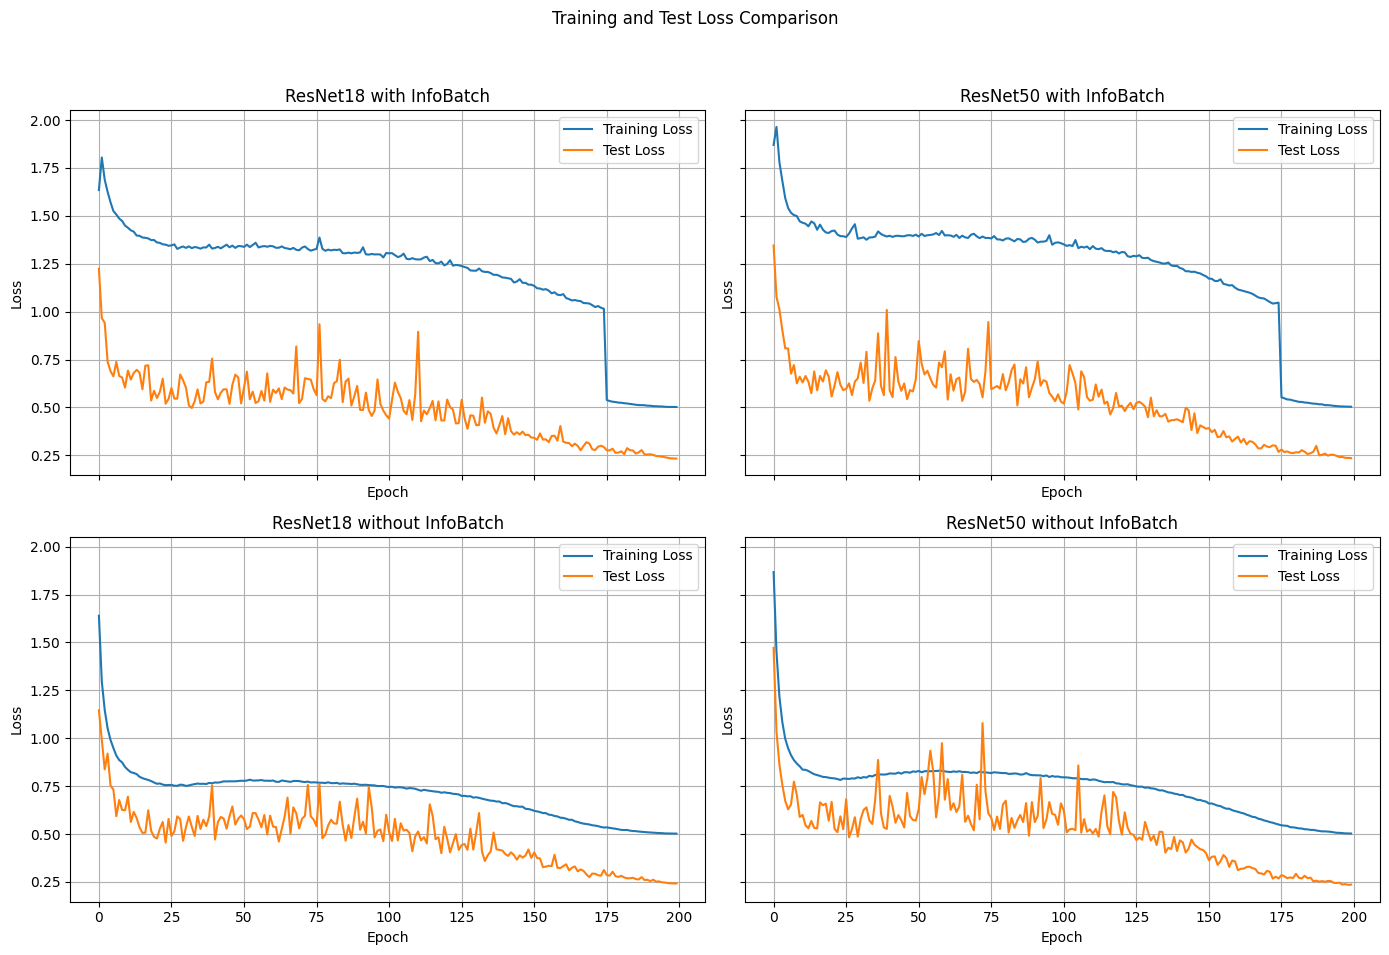

ResNet18 with InfoBatch: Best Accuracy = 95.49, Total Training Time = 6764.09 seconds
ResNet50 with InfoBatch: Best Accuracy = 95.57, Total Training Time = 15312.64 seconds
ResNet18 without InfoBatch: Best Accuracy = 95.35, Total Training Time = 10536.02 seconds
ResNet50 without InfoBatch: Best Accuracy = 95.53, Total Training Time = 23923.89 seconds


In [4]:
# 정확도 시각화 (2x2)
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
fig.suptitle('Training and Test Accuracy Comparison')

for i, ax in enumerate(axs.flat):
    # ax.plot(train_accs[i], label='Training Accuracy')
    ax.plot(valid_accs[i], label='Test Accuracy')
    ax.set_title(labels[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 손실 시각화 (2x2)
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
fig.suptitle('Training and Test Loss Comparison')

for i, ax in enumerate(axs.flat):
    ax.plot(train_losses[i], label='Training Loss')
    ax.plot(valid_losses[i], label='Test Loss')
    ax.set_title(labels[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 출력: 최고 정확도와 전체 훈련 시간
for i, label in enumerate(labels):
    print(f"{label}: Best Accuracy = {best_accs[i]:.2f}, Total Training Time = {total_times[i]:.2f} seconds")